In [1]:
import numpy as np
import pandas as pd

**Dataset**

first, we can import dataset from https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/nbaallelo.csv

In [2]:
# import the dataset
# assign to df_nba variable
df_nba = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/nbaallelo.csv')

In [3]:
df_nba

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,...,40.294830,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.640065,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,...,41.705170,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.359935,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,...,42.012257,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.631101,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,...,40.692783,CHS,Stags,63,1300.0000,1309.6521,A,L,0.368899,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,...,38.864048,WSC,Capitols,50,1300.0000,1320.3811,H,L,0.640065,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126309,63155,201506110CLE,NBA,0,2015,6/11/2015,100,1,CLE,Cavaliers,...,60.309792,GSW,Warriors,103,1790.9591,1809.9791,H,L,0.546572,NaN
126310,63156,201506140GSW,NBA,0,2015,6/14/2015,102,1,GSW,Warriors,...,68.013329,CLE,Cavaliers,91,1704.3949,1700.7391,H,W,0.765565,NaN
126311,63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,...,60.010067,GSW,Warriors,104,1809.9791,1813.6349,A,L,0.234435,NaN
126312,63157,201506170CLE,NBA,0,2015,6/16/2015,102,1,CLE,Cavaliers,...,59.290245,GSW,Warriors,105,1813.6349,1822.2881,H,L,0.481450,NaN


In [4]:
# convert date_game column become date time data type
df_nba["date_game"] = pd.to_datetime(df_nba["date_game"])

In [5]:
df_nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   gameorder      126314 non-null  int64         
 1   game_id        126314 non-null  object        
 2   lg_id          126314 non-null  object        
 3   _iscopy        126314 non-null  int64         
 4   year_id        126314 non-null  int64         
 5   date_game      126314 non-null  datetime64[ns]
 6   seasongame     126314 non-null  int64         
 7   is_playoffs    126314 non-null  int64         
 8   team_id        126314 non-null  object        
 9   fran_id        126314 non-null  object        
 10  pts            126314 non-null  int64         
 11  elo_i          126314 non-null  float64       
 12  elo_n          126314 non-null  float64       
 13  win_equiv      126314 non-null  float64       
 14  opp_id         126314 non-null  object        
 15  

**Query**

take data in a dataframe with certain condition

**Aggregate**

summarize the data per line, column to get insight about statistical info such as mean, median, sum, min and max

**Group and Aggregate**

we can group the dataset per unique value in a column and then aggregate it. Let say in NBA dataset, we can group per team and then count points total for each team.


In [6]:
df_nba.head()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,1946-11-01,1,0,TRH,Huskies,...,40.294830,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.640065,NaN
1,1,194611010TRH,NBA,1,1947,1946-11-01,1,0,NYK,Knicks,...,41.705170,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.359935,NaN
2,2,194611020CHS,NBA,0,1947,1946-11-02,1,0,CHS,Stags,...,42.012257,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.631101,NaN
3,2,194611020CHS,NBA,1,1947,1946-11-02,2,0,NYK,Knicks,...,40.692783,CHS,Stags,63,1300.0000,1309.6521,A,L,0.368899,NaN
4,3,194611020DTF,NBA,0,1947,1946-11-02,1,0,DTF,Falcons,...,38.864048,WSC,Capitols,50,1300.0000,1320.3811,H,L,0.640065,NaN


In [7]:
# we can take game at 2008
# date_game column was date time type, we can call by year
# and then we can compare at 2008, if same is True, if wrong become False
df_nba["date_game"].dt.year == 2008

0         False
1         False
2         False
3         False
4         False
          ...  
126309    False
126310    False
126311    False
126312    False
126313    False
Name: date_game, Length: 126314, dtype: bool

In [8]:
# save to variable
year2008 = df_nba["date_game"].dt.year == 2008

In [9]:
# use variable above as index
df_nba[year2008]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
106680,53341,200801020BOS,NBA,1,2008,2008-01-02,32,0,HOU,Rockets,...,45.973949,BOS,Celtics,97,1667.7777,1670.1898,A,L,0.223679,NaN
106681,53341,200801020BOS,NBA,0,2008,2008-01-02,30,0,BOS,Celtics,...,57.668251,HOU,Rockets,93,1551.6112,1549.1991,H,W,0.776321,NaN
106682,53342,200801020CHA,NBA,1,2008,2008-01-02,30,0,CHI,Bulls,...,41.457260,CHA,Hornets,97,1393.7051,1382.0941,A,W,0.500849,NaN
106683,53342,200801020CHA,NBA,0,2008,2008-01-02,30,0,CHA,Hornets,...,28.846048,CHI,Bulls,109,1494.2947,1505.9056,H,L,0.499152,NaN
106684,53343,200801020CLE,NBA,1,2008,2008-01-02,28,0,ATL,Hawks,...,35.983513,CLE,Cavaliers,98,1489.1141,1492.7603,A,L,0.318695,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109341,54671,200812310LAC,NBA,1,2009,2008-12-31,31,0,PHI,Sixers,...,37.437653,LAC,Clippers,92,1360.7100,1351.5813,A,W,0.497876,NaN
109342,54672,200812310OKC,NBA,1,2009,2008-12-31,34,0,GSW,Warriors,...,34.529926,OKC,Thunder,107,1249.9476,1261.7238,A,L,0.642762,NaN
109343,54672,200812310OKC,NBA,0,2009,2008-12-31,33,0,OKC,Thunder,...,18.524569,GSW,Warriors,100,1451.9849,1440.2087,H,W,0.357238,NaN
109344,54673,200812310TOR,NBA,0,2009,2008-12-31,32,0,TOR,Raptors,...,35.969097,DEN,Nuggets,114,1586.9221,1594.5756,H,L,0.463994,NaN


In [10]:
# for this step we take from season, particularly year_id 2008
df_nba["year_id"] == 2008

0         False
1         False
2         False
3         False
4         False
          ...  
126309    False
126310    False
126311    False
126312    False
126313    False
Name: year_id, Length: 126314, dtype: bool

In [11]:
season2008 = df_nba["year_id"] == 2008

In [12]:
df_nba[season2008]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
105770,52886,200710300GSW,NBA,1,2008,2007-10-30,1,0,UTA,Jazz,...,51.488319,GSW,Warriors,96,1578.4064,1554.9601,A,W,0.362529,NaN
105771,52886,200710300GSW,NBA,0,2008,2007-10-30,1,0,GSW,Warriors,...,46.568253,UTA,Jazz,117,1580.3591,1603.8054,H,L,0.637471,NaN
105772,52887,200710300LAL,NBA,1,2008,2007-10-30,1,0,HOU,Rockets,...,47.212399,LAL,Lakers,93,1481.0076,1475.7218,A,W,0.463994,NaN
105773,52887,200710300LAL,NBA,0,2008,2007-10-30,1,0,LAL,Lakers,...,38.295063,HOU,Rockets,95,1555.9447,1561.2305,H,L,0.536006,NaN
105774,52888,200710300SAS,NBA,1,2008,2007-10-30,1,0,POR,Trailblazers,...,32.389454,SAS,Spurs,106,1669.8276,1671.6190,A,L,0.117771,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108397,54199,200806120LAL,NBA,0,2008,2008-06-12,101,1,LAL,Lakers,...,61.411533,BOS,Celtics,97,1695.3843,1707.1495,H,L,0.680708,NaN
108398,54200,200806150LAL,NBA,0,2008,2008-06-15,102,1,LAL,Lakers,...,61.766636,BOS,Celtics,98,1707.1495,1702.6226,H,W,0.650576,NaN
108399,54200,200806150LAL,NBA,1,2008,2008-06-15,107,1,BOS,Celtics,...,60.409267,LAL,Lakers,103,1715.1279,1719.6549,A,L,0.349424,NaN
108400,54201,200806170BOS,NBA,1,2008,2008-06-17,103,1,LAL,Lakers,...,60.245529,BOS,Celtics,131,1702.6226,1721.6619,A,L,0.382819,NaN


In [13]:
# more than 1 condition
# for NBA game in season 2008 within 2008 year
df_nba[year2008 & season2008]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
106680,53341,200801020BOS,NBA,1,2008,2008-01-02,32,0,HOU,Rockets,...,45.973949,BOS,Celtics,97,1667.7777,1670.1898,A,L,0.223679,NaN
106681,53341,200801020BOS,NBA,0,2008,2008-01-02,30,0,BOS,Celtics,...,57.668251,HOU,Rockets,93,1551.6112,1549.1991,H,W,0.776321,NaN
106682,53342,200801020CHA,NBA,1,2008,2008-01-02,30,0,CHI,Bulls,...,41.457260,CHA,Hornets,97,1393.7051,1382.0941,A,W,0.500849,NaN
106683,53342,200801020CHA,NBA,0,2008,2008-01-02,30,0,CHA,Hornets,...,28.846048,CHI,Bulls,109,1494.2947,1505.9056,H,L,0.499152,NaN
106684,53343,200801020CLE,NBA,1,2008,2008-01-02,28,0,ATL,Hawks,...,35.983513,CLE,Cavaliers,98,1489.1141,1492.7603,A,L,0.318695,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108397,54199,200806120LAL,NBA,0,2008,2008-06-12,101,1,LAL,Lakers,...,61.411533,BOS,Celtics,97,1695.3843,1707.1495,H,L,0.680708,NaN
108398,54200,200806150LAL,NBA,0,2008,2008-06-15,102,1,LAL,Lakers,...,61.766636,BOS,Celtics,98,1707.1495,1702.6226,H,W,0.650576,NaN
108399,54200,200806150LAL,NBA,1,2008,2008-06-15,107,1,BOS,Celtics,...,60.409267,LAL,Lakers,103,1715.1279,1719.6549,A,L,0.349424,NaN
108400,54201,200806170BOS,NBA,1,2008,2008-06-17,103,1,LAL,Lakers,...,60.245529,BOS,Celtics,131,1702.6226,1721.6619,A,L,0.382819,NaN


In [14]:
# game number at season 2008 and year 2008
# 1 more condition, does not copy data
iscopy1 = df_nba["_iscopy"] == 1

In [15]:
# we use 3 condition as index
df_nba[iscopy1 & year2008 & season2008].shape

(861, 23)

In [ ]:
# in shape information we know that 861 game in 2008 include season 2008

We can use Queery to take the data in certain condition. after that, we can summarize as statistical information using **aggregate**.

example : take game with team_id namely BOS at 2008, how much the average points

In [18]:
# start with querying team_id BOS
# then querying match at 2008 for date_game
k1 = df_nba["team_id"] == "BOS"
k2 = df_nba["date_game"].dt.year == 2008

df_BOS_2008 = df_nba[k1 & k2]

# after querying, we can see points column
# we can aggregate points column become mean
df_BOS_2008["pts"].mean()

99.15178571428571

if we want to see average points of each team at 2008, we can use **groupby**

In [19]:
# in the 2008 (year)
year2008 = df_nba["date_game"].dt.year == 2008

df = df_nba[year2008]

# for every team_id
# df_nba.groupby("team_id")

df = df.groupby("team_id")

# average points
# df_nba["pts"].mean()

df[["pts"]].mean()

,pts
team_id,
ATL,98.709677
BOS,99.151786
CHA,96.094118
CHI,99.882353
CLE,97.442105
DAL,99.770115
DEN,108.550562
DET,94.897959
GSW,109.642857


In [20]:
df_nba[df_nba["date_game"].dt.year == 2008]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
106680,53341,200801020BOS,NBA,1,2008,2008-01-02,32,0,HOU,Rockets,...,45.973949,BOS,Celtics,97,1667.7777,1670.1898,A,L,0.223679,NaN
106681,53341,200801020BOS,NBA,0,2008,2008-01-02,30,0,BOS,Celtics,...,57.668251,HOU,Rockets,93,1551.6112,1549.1991,H,W,0.776321,NaN
106682,53342,200801020CHA,NBA,1,2008,2008-01-02,30,0,CHI,Bulls,...,41.457260,CHA,Hornets,97,1393.7051,1382.0941,A,W,0.500849,NaN
106683,53342,200801020CHA,NBA,0,2008,2008-01-02,30,0,CHA,Hornets,...,28.846048,CHI,Bulls,109,1494.2947,1505.9056,H,L,0.499152,NaN
106684,53343,200801020CLE,NBA,1,2008,2008-01-02,28,0,ATL,Hawks,...,35.983513,CLE,Cavaliers,98,1489.1141,1492.7603,A,L,0.318695,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109341,54671,200812310LAC,NBA,1,2009,2008-12-31,31,0,PHI,Sixers,...,37.437653,LAC,Clippers,92,1360.7100,1351.5813,A,W,0.497876,NaN
109342,54672,200812310OKC,NBA,1,2009,2008-12-31,34,0,GSW,Warriors,...,34.529926,OKC,Thunder,107,1249.9476,1261.7238,A,L,0.642762,NaN
109343,54672,200812310OKC,NBA,0,2009,2008-12-31,33,0,OKC,Thunder,...,18.524569,GSW,Warriors,100,1451.9849,1440.2087,H,W,0.357238,NaN
109344,54673,200812310TOR,NBA,0,2009,2008-12-31,32,0,TOR,Raptors,...,35.969097,DEN,Nuggets,114,1586.9221,1594.5756,H,L,0.463994,NaN


In [21]:
# after querying the data, we can take 1 points column
df_nba[df_nba["date_game"].dt.year == 2008]["pts"]

106680     93
106681     97
106682    109
106683     97
106684     94
         ... 
109341    100
109342    100
109343    107
109344    107
109345    114
Name: pts, Length: 2666, dtype: int64

In [22]:
# aggregate for average (mean)
df_nba[df_nba["date_game"].dt.year == 2008]["pts"].mean()

99.55176294073519

In [23]:
# we can insert groupby before aggregate, after querying
df_nba[df_nba["date_game"].dt.year == 2008].groupby("team_id")["pts"].mean()

team_id
ATL     98.709677
BOS     99.151786
CHA     96.094118
CHI     99.882353
CLE     97.442105
DAL     99.770115
DEN    108.550562
DET     94.897959
GSW    109.642857
HOU     97.100000
IND    103.469136
LAC     94.023810
LAL    107.563107
MEM     98.440476
MIA     92.463415
MIL     97.541176
MIN     96.469880
NJN     98.523810
NOH     99.989011
NYK    100.674699
OKC     93.606061
ORL    102.626374
PHI     96.431818
PHO    107.313953
POR     96.530120
SAC    101.752941
SAS     94.594059
SEA     97.176471
TOR    100.068966
UTA    103.787234
WAS     96.640449
Name: pts, dtype: float64

Combined query, groupby, aggregate allows us to prepare data for visualization

to create visual data we use another package, called matplotlib (can add annotations, change colors etc.)

even without using matplotlib, pandas has some basic visualization techniques

example: we can try to compare the average pts from every year for the BOS and LAL teams.

In [24]:
# BOS team
df_bos = df_nba[df_nba["team_id"]=="BOS"]
df_bos.head(2)

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
6,4,194611020PRO,NBA,1,1947,1946-11-02,1,0,BOS,Celtics,...,40.459381,PRO,Steamrollers,59,1300.0000,1305.1542,A,L,0.359935,NaN
14,8,194611050BOS,NBA,0,1947,1946-11-05,2,0,BOS,Celtics,...,39.785030,CHS,Stags,57,1309.6521,1316.0840,H,L,0.620204,NaN


In [25]:
# average points
df_bos["pts"].mean()

104.46623311655829

In [26]:
# average points in very year
df_bos_pts = df_bos.groupby("year_id")[["pts"]].mean()

In [27]:
df_bos_pts.head(5)

,pts
year_id,
1947,60.083333
1948,69.215686
1949,76.550000
1950,79.691176
1951,84.901408


In [28]:
# LAL team
df_lal = df_nba[df_nba["team_id"]=="LAL"]
df_lal_pts = df_lal.groupby("year_id")[["pts"]].mean()
df_lal_pts.head(5)

,pts
year_id,
1961,114.472527
1962,118.408602
1963,115.172043
1964,109.176471
1965,112.142857


In [29]:
# union df_bos and df_lal
df_bos_lal_pts = pd.concat([df_bos_pts, df_lal_pts], axis=1)
df_bos_lal_pts.tail(7)


,pts,pts
year_id,,
2009,101.093750,105.933333
2010,98.009434,101.561905
2011,96.318681,100.576087
2012,91.302326,96.794872
2013,95.540230,101.418605
2014,96.243902,102.951220
2015,101.058140,98.451220


In [30]:
# change column title
df_bos_lal_pts.columns = ["BOS", "LAL"]

In [31]:
df_bos_lal_pts.tail(6).tail(6)

,BOS,LAL
year_id,,
2010,98.009434,101.561905
2011,96.318681,100.576087
2012,91.302326,96.794872
2013,95.540230,101.418605
2014,96.243902,102.951220
2015,101.058140,98.451220


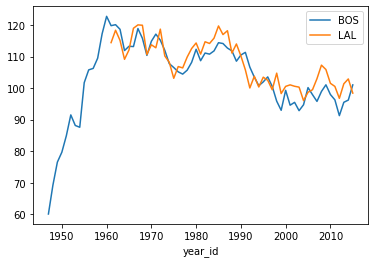

In [32]:
# if the data was clean, we can visulize the data
df_bos_lal_pts.plot()

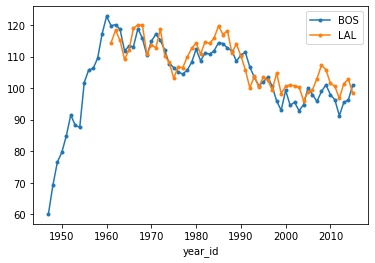

In [33]:
# add dot marker to graphic
df_bos_lal_pts.plot(marker=".")

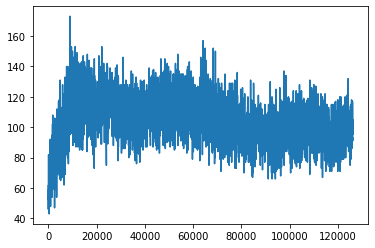

In [34]:
# plot the points that get BOS team per game
df_bos = df_nba[df_nba["team_id"]=="BOS"]
df_bos["pts"].plot()

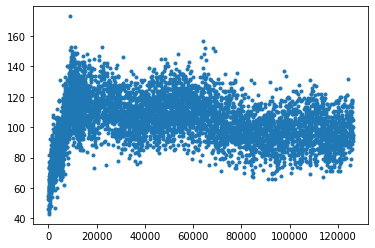

In [35]:
df_bos["pts"].plot(marker='.', linestyle='none')

if we plot the data directly without being aggregated, it's possible, only this time the data is too much to see visually - we don't get any information. if it is aggregated first, per month or per year, it will be more useful.

we can compare 5 teams whose average pts are the highest, what is their average trend of points per year

*trend --> line plot, bar chart, area plot

In [36]:
# 5 teams with highest average points
df_nba.groupby("team_id")["pts"].mean()

team_id
ANA    111.589744
AND     86.013889
ATL    101.920198
BAL    113.293303
BLB     79.698073
          ...    
WAS     96.551186
WAT     79.370968
WSA    118.395604
WSB    104.214859
WSC     76.931271
Name: pts, Length: 104, dtype: float64

In [37]:
df_nba.groupby("team_id")["pts"].mean().sort_values(ascending=False)

team_id
TEX    120.808989
DNA    119.639175
OAK    119.215116
PTC    119.148810
WSA    118.395604
          ...    
STB     71.457831
CLR     71.015873
TRH     66.583333
DTF     63.283333
PIT     61.233333
Name: pts, Length: 104, dtype: float64

In [38]:
df_nba.groupby("team_id")["pts"].mean().sort_values(ascending=False).head(5)

team_id
TEX    120.808989
DNA    119.639175
OAK    119.215116
PTC    119.148810
WSA    118.395604
Name: pts, dtype: float64

In [39]:
top5 = df_nba.groupby("team_id")["pts"].mean().sort_values(ascending=False).head(5).index
top5

Index(['TEX', 'DNA', 'OAK', 'PTC', 'WSA'], dtype='object', name='team_id')

In [40]:
# for each team, we can save their data
df_tex = df_nba[df_nba["team_id"] == "TEX"]
df_tex_pts = df_tex.groupby("year_id")["pts"].mean()
df_tex_pts.head()

year_id
1971    120.808989
Name: pts, dtype: float64

In [41]:
df_dna = df_nba[df_nba["team_id"] == "DNA"]
df_dna_pts = df_dna.groupby("year_id")["pts"].mean()
df_dna_pts.head()

year_id
1975    118.175258
1976    121.103093
Name: pts, dtype: float64

it looks like that the average pts is high, the data is small, there are not many trends that we can see later

let's change, see the trend for the 5 teams with the most games match

In [42]:
df_nba["team_id"].value_counts()

BOS    5997
NYK    5769
LAL    5078
DET    4985
PHI    4533
       ... 
INJ      60
PIT      60
DTF      60
TRH      60
SDS      11
Name: team_id, Length: 104, dtype: int64

In [43]:
top5 = df_nba["team_id"].value_counts().head().index
top5 = list(top5)
top5

['BOS', 'NYK', 'LAL', 'DET', 'PHI']

In [44]:
df_1 = df_nba[df_nba["team_id"] == "BOS"]
df_1_pts = df_1.groupby("year_id")["pts"].mean()

df_2 = df_nba[df_nba["team_id"] == "NYK"]
df_2_pts = df_2.groupby("year_id")["pts"].mean()

df_3 = df_nba[df_nba["team_id"] == "LAL"]
df_3_pts = df_3.groupby("year_id")["pts"].mean()

df_4 = df_nba[df_nba["team_id"] == "DET"]
df_4_pts = df_4.groupby("year_id")["pts"].mean()

df_5 = df_nba[df_nba["team_id"] == "PHI"]
df_5_pts = df_5.groupby("year_id")["pts"].mean()

In [45]:
df_top5_pts = pd.concat([df_1_pts, df_2_pts, df_3_pts, df_4_pts, df_5_pts], axis=1)
df_top5_pts.columns = top5

df_top5_pts

,BOS,NYK,LAL,DET,PHI
year_id,,,,,
1947,60.083333,65.138462,NaN,NaN,NaN
1948,69.215686,74.803922,NaN,NaN,NaN
1949,76.550000,79.590909,NaN,NaN,NaN
1950,79.691176,81.150685,NaN,NaN,NaN
1951,84.901408,85.175000,NaN,NaN,NaN
...,...,...,...,...,...
2011,96.318681,105.779070,100.576087,96.963415,98.298851
2012,91.302326,96.788732,96.794872,90.863636,92.329114
2013,95.540230,98.500000,101.418605,94.853659,93.170732


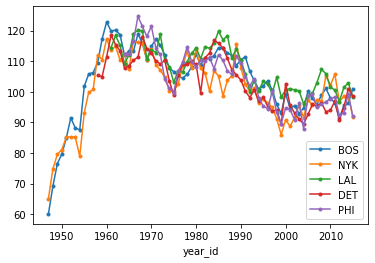

In [46]:
df_top5_pts.plot(marker=".")

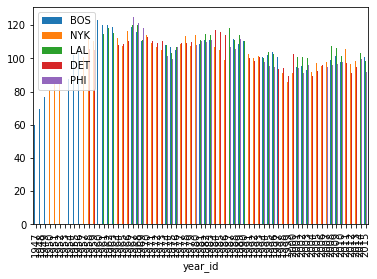

In [47]:
df_top5_pts.plot(kind="bar")

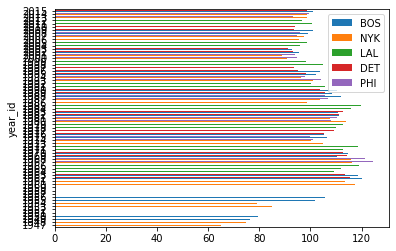

In [48]:
df_top5_pts.plot(kind="barh")

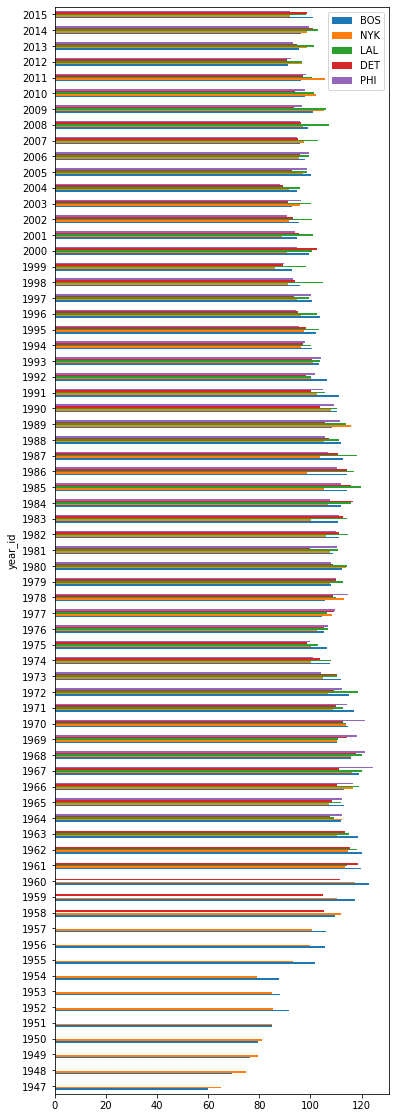

In [49]:
df_top5_pts.plot(kind="barh", figsize=(6,20))

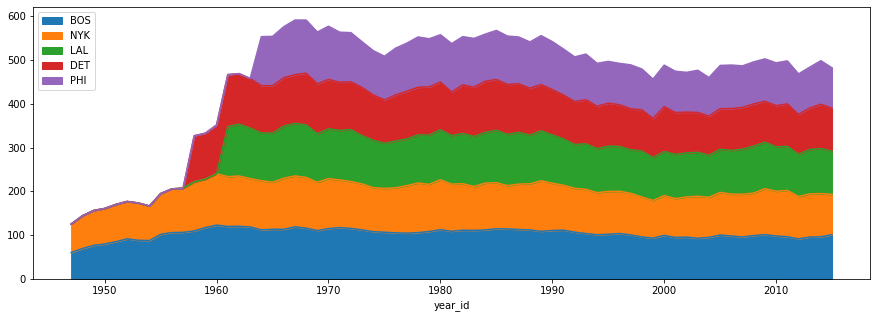

In [50]:
df_top5_pts.plot(kind="area", figsize=(15,5))

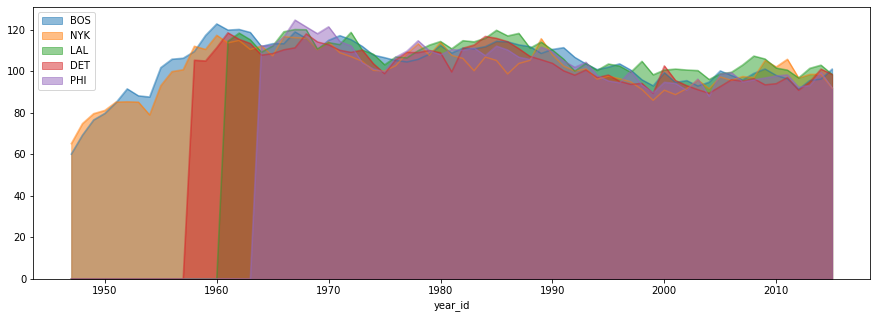

In [51]:
df_top5_pts.plot(kind="area", figsize=(15,5), stacked=False)

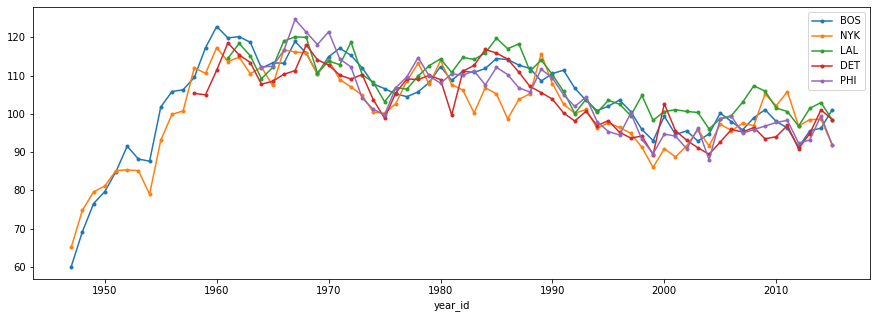

In [52]:
df_top5_pts.plot(marker=".",figsize=(15,5))